##  Project Overall Objects

This notebook file would approach and achieve the objects highlighted in **black**. Those in *<font color=grey>grey</font>* would be accomplished in later analysis. Those in *<font color=green>green</font>* have already been accomplished in earlier analysis. 

- <font color=green> Clean dirty log data and transform it for analytics. </font>
- <font color=green> Exploratory Data Analysis (EDA) </font>
- Find the conversion rate of users, **identify key factors that bottleneck the conversion rate.**
    - In other words, cut by features
- Propose any hypothesis and test through analyzing features.
- <font color=grey> Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc. </font>
- <font color=grey> Discover interesting insights in the dataset and suggest how to improve the user signup rate. </font>

This notebook file is developed from basic data cleaning and EDA. It's focused on further investigating the factors of conversion rates and sign up rates by analyzing the features. This notebook would continue to analyze the dataset by looking at the differences in feature performances, known as "cut by features". 

We would also deal with missing values that was neglected in first step of EDA. Since we are interpreting the results from the meanings of each feature, there's NO need to operate any NLP, except we become interested in the sources/mediums/etc. of the advertisements and or pages visited. 

The outpuf of this notebook is a further-cleaned dataset, with selected features that are seemingly significant in determining or predicting the sign up/conversion rate, which would be used for building machine learning models later.

In [1]:
import pandas as pd
import json
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [3]:
# Load data from file
df = pd.read_csv('data/cleaned_data.csv')

In [4]:
df.head()

,dist_id,event,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,latest_utm_m,...,pageP,time,CN,CT,source,medium,content,weekend,freq,signup
0,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,chrome,56.0,2017-03-06,True,False,219.135.131.99,baidu,cpc,...,2.0,1488791047953,1,Guangzhou,baidu,cpc,others,0,2,0
1,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,chrome,56.0,2017-03-06,True,True,111.204.198.242,NaN,NaN,...,NaN,1488791050856,0,0,sensordata,ukmedium,ukcontent,0,21,0
2,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,chrome,56.0,2017-03-06,True,False,111.204.198.242,NaN,NaN,...,NaN,1488791051772,1,Beijing,sensordata,ukmedium,ukcontent,0,21,0
3,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,chrome,56.0,2017-03-06,True,False,111.204.198.242,NaN,NaN,...,NaN,1488791056032,1,Beijing,sensordata,ukmedium,ukcontent,0,21,0
4,595466e9a8e733434ce08de16e927d985e0b5d48,demo_leave,chrome,56.0,2017-03-06,True,False,219.135.131.99,baidu,cpc,...,1.0,1488791057880,1,Beijing,baidu,cpc,others,0,2,0


In [5]:
df.shape

(65673, 25)

In [6]:
avg_st = df[['dist_id','pageS']].groupby(['dist_id']).median()

In [7]:
avg_st[0:5]

,pageS
dist_id,
00007ef910b6c9911f1b89d01a09aa3fc862f4a9,NaN
000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,921142.371
000c46a27ef69fa22b56d253a9c72773338a1686,2586.546
000ed1dcd942969b458c5b308937c6389c08f999,30.680
00111feff544ef5280a4c7064a362a9ea59c9389,NaN


In [8]:
df.groupby(["dist_id"]).apply(lambda x: x.sort_values(["time"], ascending = True)).reset_index(drop=True)
#df.sort_values(['time','dist_id'], ascending=True).groupby(['dist_id']).head()

,dist_id,event,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,latest_utm_m,...,pageP,time,CN,CT,source,medium,content,weekend,freq,signup
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,$pageview,qq,7.30000,2017-03-06,False,True,36.23.47.33,baidu,mcpc,...,NaN,1488865937039,1,Shanghai,baidu,others,others,0,6,1
1,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,btnClick,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865940372,1,Shanghai,baidu,others,others,0,6,1
2,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,click_send_cellphone,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865949692,1,Beijing,baidu,others,others,0,6,1
3,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,click_send_cellphone,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865956872,0,Chicago,baidu,others,others,0,6,1
4,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865970389,1,Hangzhou,baidu,others,others,0,6,1
5,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,verify_cellphone_code,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865971618,1,Hangzhou,baidu,others,others,0,6,1
6,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,chrome,56.00000,2017-03-12,False,False,111.193.183.253,baidu,cpc,...,1.0,1489373568278,1,Guangzhou,baidu,cpc,others,1,1,0
7,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,chrome,56.00000,2017-03-06,True,True,27.38.250.222,NaN,NaN,...,NaN,1488865745811,1,Beijing,sensordata,ukmedium,ukcontent,0,22,0
8,000c46a27ef69fa22b56d253a9c72773338a1686,btnClick,chrome,56.00000,2017-03-06,True,False,27.38.250.222,NaN,NaN,...,NaN,1488865751642,1,Beijing,sensordata,ukmedium,ukcontent,0,22,0
9,000c46a27ef69fa22b56d253a9c72773338a1686,index_leave,chrome,56.00000,2017-03-06,True,False,27.38.250.222,NaN,NaN,...,1.0,1488865751647,1,Shanghai,sensordata,ukmedium,ukcontent,0,22,0


In [9]:
count = []
npage = []
nclick = []
ileave = []
df_new = pd.DataFrame()
grouped = df.groupby('dist_id')
for name, group in grouped:
    ct = 0
    page = 0
    click = 0
    leave = 0
    for index, row in group.iterrows():
        if group.event[index] != "formSubmit" and ct != group.shape[0]-1:
            ct+=1
            if group.event[index] == "index_leavet":
                leave+=1
            if group.event[index] == "$pageview":
                page+=1
            if group.event[index] == "btnClick":
                click+=1     
        else:
            df_new = df_new.append(group.loc[index])
            ct+=1
            if group.event[index] == "index_leave":
                leave+=1
            if group.event[index] == "$pageview":
                page+=1
            if group.event[index] == "btnClick":
                click+=1   
            count.append(ct)
            npage.append(page)
            nclick.append(click)
            ileave.append(leave)
            break

In [10]:
df_new[['time','day','dist_id','freq','event']].head()

,time,day,dist_id,freq,event
6051,1.488866e+12,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,6.0,formSubmit
46921,1.489374e+12,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1.0,index_leave
7243,1.488871e+12,2017-03-06,000c46a27ef69fa22b56d253a9c72773338a1686,22.0,$pageview
47483,1.489376e+12,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,4.0,$pageview
28974,1.489059e+12,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,1.0,$pageview


In [11]:
#df_first=df.groupby(["dist_id"]).apply(lambda x: x.sort_values(["time"], ascending = True)).head(1)
df_first = df.sort_values(['dist_id','time'],ascending=True).groupby('dist_id').head(1)

In [12]:
df_first.head()

,dist_id,event,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,latest_utm_m,...,pageP,time,CN,CT,source,medium,content,weekend,freq,signup
6031,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,$pageview,qq,7.3,2017-03-06,False,True,36.23.47.33,baidu,mcpc,...,NaN,1488865937039,1,Shanghai,baidu,others,others,0,6,1
46921,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,chrome,56.0,2017-03-12,False,False,111.193.183.253,baidu,cpc,...,1.0,1489373568278,1,Guangzhou,baidu,cpc,others,1,1,0
5997,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,chrome,56.0,2017-03-06,True,True,27.38.250.222,NaN,NaN,...,NaN,1488865745811,1,Beijing,sensordata,ukmedium,ukcontent,0,22,0
47459,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,qq,9.5,2017-03-12,True,True,116.226.32.214,sanjieke.cn,NaN,...,NaN,1489375777008,1,Wuhan,others,ukmedium,ukcontent,1,4,0
28974,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,safari,9.0,2017-03-09,True,True,117.136.38.216,baidu,mcpc,...,NaN,1489059275387,1,Chengdu,baidu,others,others,0,1,0


In [13]:
df_new['Ttoend'] = df_new['time'].values-df_first['time'].values

In [14]:
df_new['Ttoend'].head()

6051       33350.0
46921          0.0
7243     4977084.0
47483      35577.0
28974          0.0
Name: Ttoend, dtype: float64

In [15]:
df_new['count'] = count

In [16]:
df_new['npage'] = npage

In [17]:
df_new['nclick'] = nclick

In [18]:
df_new['ileave'] = ileave

In [19]:
df_new['avg_st'] = avg_st.values

In [20]:
df_new.shape

(11708, 31)

In [21]:
df_new

,CN,CT,browser,browser_v,content,day,dist_id,event,freq,ip,...,signup,source,time,weekend,Ttoend,count,npage,nclick,ileave,avg_st
6051,1.0,Hangzhou,qq,7.30000,others,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,1.0,baidu,1.488866e+12,0.0,33350.0,5,1,1,0,NaN
46921,1.0,Guangzhou,chrome,56.00000,others,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,0.0,baidu,1.489374e+12,1.0,0.0,1,0,0,1,921142.3710
7243,1.0,Guangzhou,chrome,56.00000,ukcontent,2017-03-06,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,0.0,sensordata,1.488871e+12,0.0,4977084.0,22,6,9,0,2586.5460
47483,1.0,Hangzhou,qq,9.50000,ukcontent,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,0.0,others,1.489376e+12,1.0,35577.0,4,2,1,0,30.6800
28974,1.0,Chengdu,safari,9.00000,others,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,0.0,baidu,1.489059e+12,0.0,0.0,1,1,0,0,NaN
22480,1.0,Zhengzhou,chrome,56.00000,others,2017-03-08,0011f5066b1c62717255852fdb15a0473a5c2b19,$pageview,6.0,119.57.163.82,...,0.0,baidu,1.489029e+12,0.0,33799.0,6,3,2,0,4.1700
3663,0.0,Bangkok,chrome,56.00000,others,2017-03-06,0012ea1b517e6959354abaa6954711054ec831b9,index_leave,2.0,101.71.245.170,...,0.0,baidu,1.488851e+12,0.0,32655.0,2,1,0,1,35.7470
28509,1.0,Beijing,na,-1.00000,others,2017-03-09,002232cd6da95fae1cc9a5fbaa7c2d0e11fbd57b,index_leave,3.0,223.73.25.141,...,0.0,baidu,1.489055e+12,0.0,17025.0,3,1,1,1,18.9160
21090,1.0,NaN,micromessenger,6.50000,ukcontent,2017-03-08,00229f012ef316de6efdcbc380ffdb2558e9ff81,$pageview,3.0,223.104.38.131,...,0.0,sensordata,1.489022e+12,0.0,35091.0,3,2,1,0,NaN
39158,1.0,Wuhan,qq,6.00000,others,2017-03-10,0023b8aa9adf510ef81d0e90e175d809f2bf6059,$pageview,1.0,153.37.200.192,...,0.0,baidu,1.489157e+12,0.0,0.0,1,1,0,0,NaN


In [22]:
df_new.shape

(11708, 31)

In [23]:
df_new.isnull().sum()

CN                       0
CT                     181
browser                  0
browser_v                0
content                  0
day                      0
dist_id                  0
event                    0
freq                     0
ip                       0
is_fd                    0
is_ft                    0
latest_utm_content    4586
latest_utm_m          4488
latest_utm_s          4395
medium                   0
model                    0
os                       0
os_version               0
pageP                 6190
pageS                 6137
signup                   0
source                   0
time                     0
weekend                  0
Ttoend                   0
count                    0
npage                    0
nclick                   0
ileave                   0
avg_st                4296
dtype: int64

## Dataset Description

- browser
- browser version
- cost per click: source medium 
- the day of this event
- is first day
- is first time
- event
- frequency (total)
- utm_source
- utm_medium
- ip address
- user source
- model (pc or mac or cellphone)
- operation system
- os version
- page stay time
- time 
- is ip address in China
- ip address location city
- is the time in weekend
- did the user sign up 
- count user interactions before form submit
- count number of events (including page view, btnclick and index leave) before form submit
- calculate the time from first use to form submit
- average stay time on page

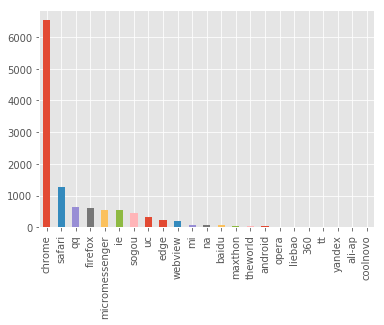

In [24]:
df_new['browser'].value_counts(dropna=False).plot.bar()

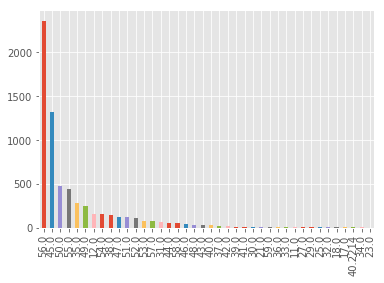

In [25]:
df_new.loc[df['browser'] == 'chrome']['browser_v'].value_counts(dropna=False).plot.bar()

In [26]:
df_new['browser_chrome'] = np.where(df_new['browser'] == 'chrome', '1', '0')

In [27]:
df_new['browser_chrome'].value_counts(dropna=False)

1    6531
0    5177
Name: browser_chrome, dtype: int64

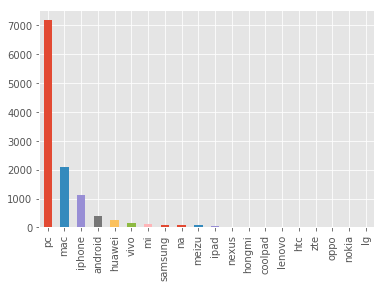

In [28]:
df_new['model'].value_counts(dropna=False).plot.bar()

In [29]:
df_new['model_bin'] = df_new['model'] 

In [30]:
df_new.model_bin[~df_new.model.isin(['pc','mac'])] = 'others'

#s[s.index.isin([2, 4, 6])]

In [31]:
df_new['model_bin'].value_counts(dropna=False)

pc        7178
others    2439
mac       2091
Name: model_bin, dtype: int64

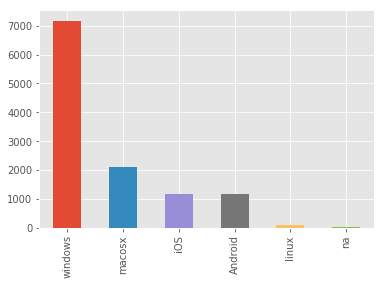

In [32]:
df_new['os'].value_counts(dropna=False).plot.bar()

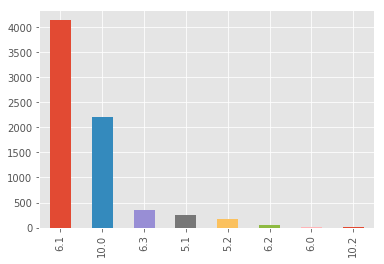

In [33]:
df_new.loc[df['os'] == 'windows']['os_version'].value_counts(dropna=False).plot.bar()

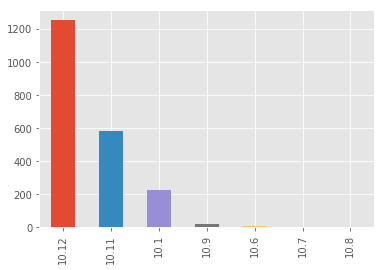

In [34]:
df_new.loc[df['os'] == 'macosx']['os_version'].value_counts(dropna=False).plot.bar()

In [35]:
df_new['os_bin'] = df_new['os'] 

In [36]:
df_new.os_bin[~df_new.os.isin(['windows','macosx'])] = 'others'

In [37]:
df_new['os_bin'].value_counts(dropna=False)

windows    7178
others     2439
macosx     2091
Name: os_bin, dtype: int64

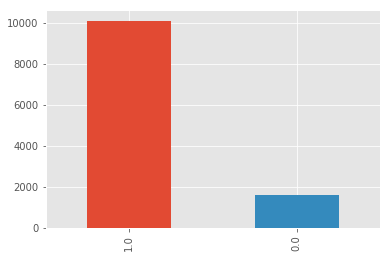

In [38]:
df_new['CN'].value_counts(dropna=False).plot.bar()

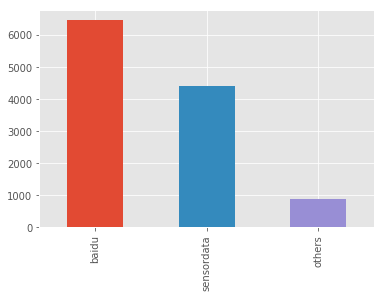

In [39]:
df_new['source'].value_counts(dropna=False).plot.bar()

might need to change source, create another value for nan: these people might already know sensordata, and go to the website directly.

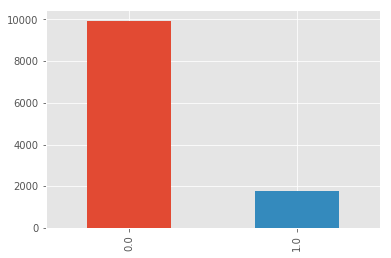

In [40]:
df_new['weekend'].value_counts(dropna=False).plot.bar()

Most people know or check this website for work. The number of interactions on weekends is small.

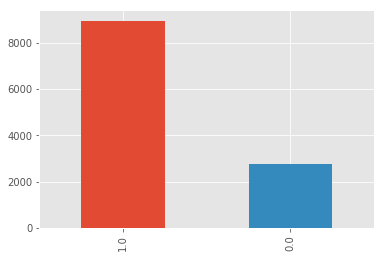

In [41]:
df_new['is_fd'].value_counts(dropna=False).plot.bar()

Some people come the other day

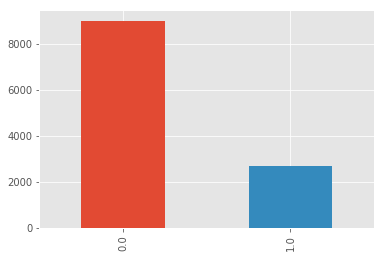

In [42]:
df_new['is_ft'].value_counts(dropna=False).plot.bar()

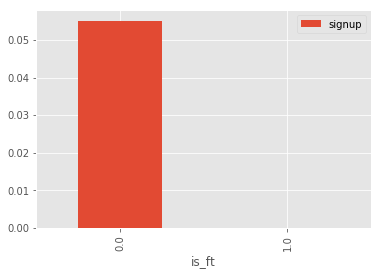

In [43]:
df_new[['is_ft', 'signup']].groupby(['is_ft']).mean().plot.bar()

## Clean data - dealing with missing values

In [44]:
# Count missing values by column
df_new.isnull().sum()

CN                       0
CT                     181
browser                  0
browser_v                0
content                  0
day                      0
dist_id                  0
event                    0
freq                     0
ip                       0
is_fd                    0
is_ft                    0
latest_utm_content    4586
latest_utm_m          4488
latest_utm_s          4395
medium                   0
model                    0
os                       0
os_version               0
pageP                 6190
pageS                 6137
signup                   0
source                   0
time                     0
weekend                  0
Ttoend                   0
count                    0
npage                    0
nclick                   0
ileave                   0
avg_st                4296
browser_chrome           0
model_bin                0
os_bin                   0
dtype: int64

In [45]:
df_new['CT_bin'] = df_new['CT']

In [46]:
df_new.CT_bin[~df_new.CT.isin(['Beijing','Shanghai','Guangzhou'])] = 'others'

In [47]:
df_new['CT_bin'].value_counts(dropna=False)

others       5631
Beijing      3641
Guangzhou    1221
Shanghai     1215
Name: CT_bin, dtype: int64

In [48]:
import geoip2.database
# read library from local file
reader = geoip2.database.Reader('./data/GeoLite2-City_20180501/GeoLite2-City.mmdb')

In [49]:
# too many cities, use province to do analysis
PRO=[]
for index, row in df_new.iterrows():
    try:
        PRO.append(reader.city(df_new.loc[index,'ip']).subdivisions.most_specific.iso_code) 
    except:
        PRO.append('0')

In [50]:
df_new['PRO'] = PRO

In [51]:
df_new['PRO_bin'] = df_new['PRO']

In [52]:
df_new.PRO_bin[~df_new.PRO.isin(['BJ','GD','SH','ZJ'])] = 'others'

In [53]:
df_new['PRO_bin'].value_counts(dropna=False)

BJ        3960
others    2881
GD        2478
SH        1385
ZJ        1004
Name: PRO_bin, dtype: int64

In [54]:
df_new.describe()

,CN,browser_v,freq,is_fd,is_ft,os_version,pageP,pageS,signup,time,weekend,Ttoend,count,npage,nclick,ileave,avg_st
count,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,5518.000000,5.571000e+03,11708.000000,1.170800e+04,11708.000000,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.00000,7.412000e+03
mean,0.863683,33.023361,5.609242,0.764178,0.229587,7.753071,1.784523,1.009756e+04,0.042450,1.489164e+12,0.151520,2.809726e+07,4.987444,2.554920,1.039716,0.36411,7.209755e+03
std,0.343140,21.660523,10.500759,0.424529,0.420585,2.205608,0.968303,6.525297e+04,0.201621,2.263144e+08,0.358571,1.026529e+08,9.048549,4.609698,2.484745,0.48120,6.471723e+04
min,0.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,3.300000e-02,0.000000,1.488791e+12,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.00000,3.300000e-02
25%,1.000000,9.500000,1.000000,1.000000,0.000000,6.100000,1.000000,7.478000e+00,0.000000,1.488965e+12,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.00000,7.744750e+00
50%,1.000000,45.000000,2.000000,1.000000,0.000000,6.200000,1.000000,2.704500e+01,0.000000,1.489130e+12,0.000000,1.871450e+04,2.000000,1.000000,0.000000,0.00000,2.283800e+01
75%,1.000000,55.000000,5.000000,1.000000,0.000000,10.000000,2.000000,5.896960e+02,0.000000,1.489391e+12,0.000000,4.547025e+05,5.000000,2.000000,1.000000,1.00000,1.839218e+02
max,1.000000,59.000000,254.000000,1.000000,1.000000,10.900000,4.000000,1.749192e+06,1.000000,1.489517e+12,1.000000,7.101324e+08,254.000000,152.000000,69.000000,1.00000,2.918014e+06


### Explore sign up rate split by features 

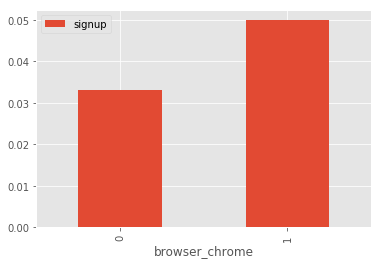

In [55]:
df_new[['browser_chrome', 'signup']].groupby(['browser_chrome']).mean().plot.bar()

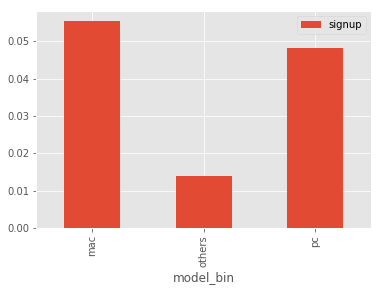

In [56]:
df_new[['model_bin', 'signup']].groupby(['model_bin']).mean().plot.bar()

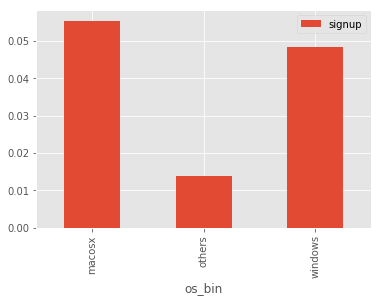

In [57]:
df_new[['os_bin', 'signup']].groupby(['os_bin']).mean().plot.bar()

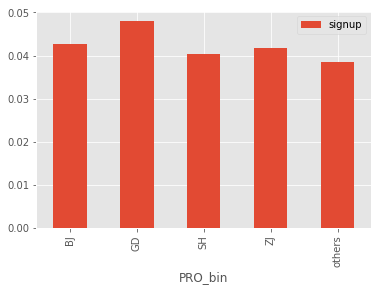

In [58]:
df_new[['PRO_bin', 'signup']].groupby(['PRO_bin']).mean().plot.bar()

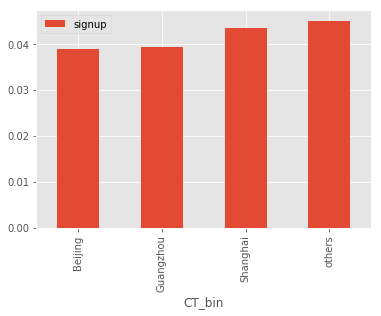

In [59]:
df_new[['CT_bin', 'signup']].groupby(['CT_bin']).mean().plot.bar()

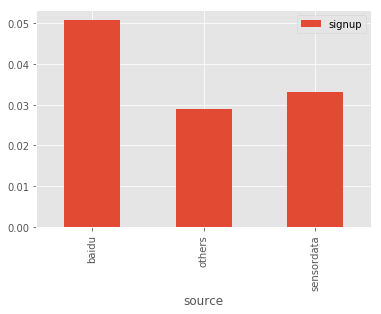

In [60]:
df_new[['source', 'signup']].groupby(['source']).mean().plot.bar()

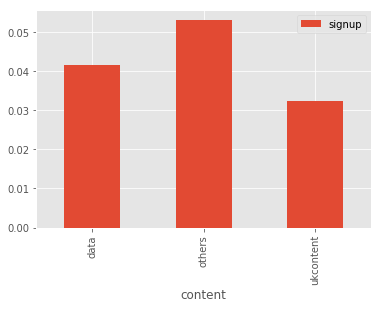

In [61]:
df_new[['content', 'signup']].groupby(['content']).mean().plot.bar()

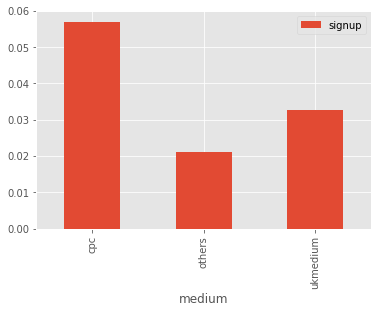

In [62]:
df_new[['medium', 'signup']].groupby(['medium']).mean().plot.bar()

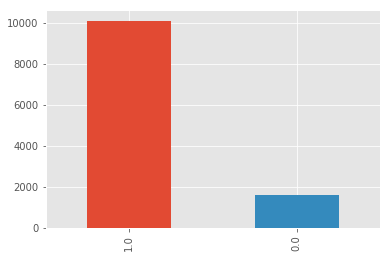

In [63]:
df_new['CN'].value_counts(dropna=False).plot.bar()

In [64]:
df_new['CN'].value_counts(dropna=False)

1.0    10112
0.0     1596
Name: CN, dtype: int64

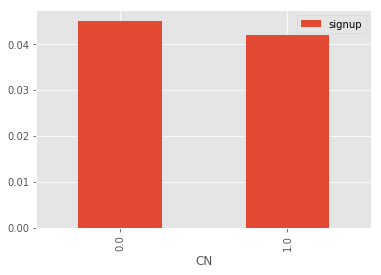

In [65]:
df_new[['CN', 'signup']].groupby(['CN']).mean().plot.bar()

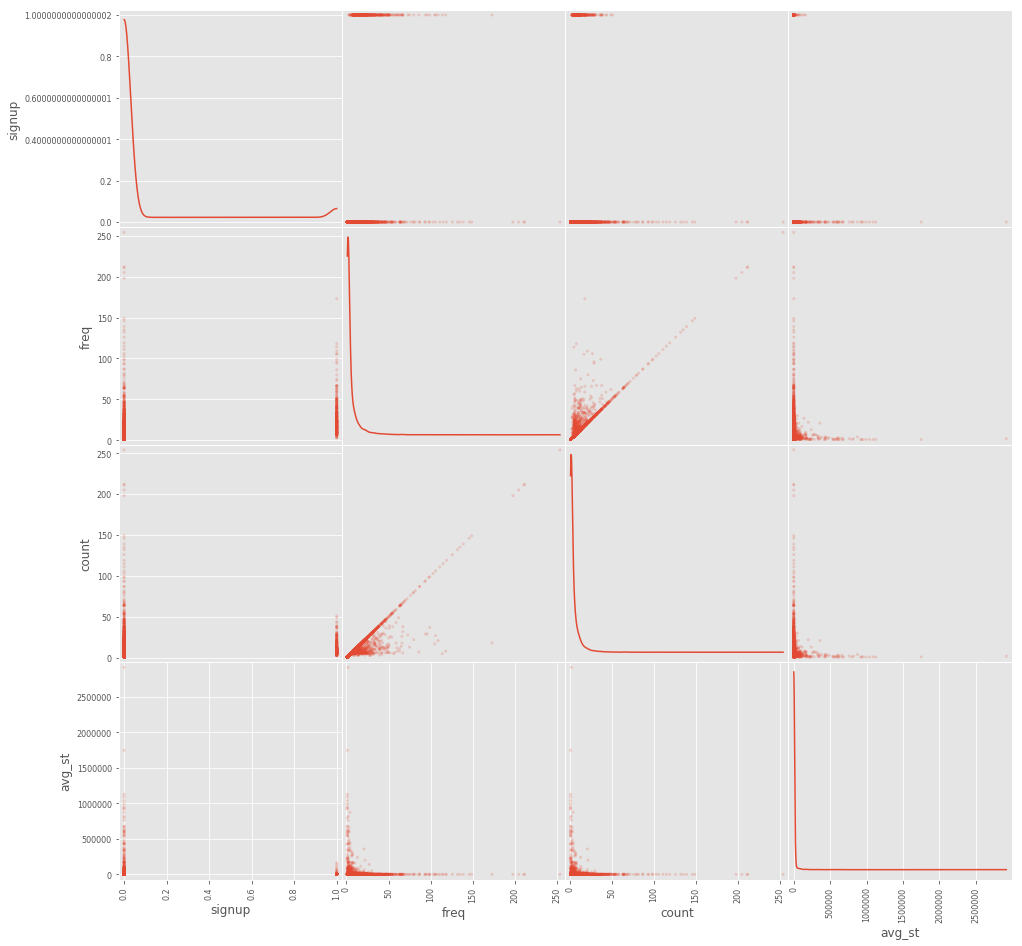

In [77]:
# Use scatter_matrix from Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df_new[[u'signup', u'freq', u'count',u'avg_st']], 
               alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.savefig('timescatter_signup_split.png',bbox_inches="tight",dpi=500)
plt.show()

frequency and count highly correlated!

People not in China has higher sign up rate

over 1200 users in China, try to create a column for different user interaction of the day

In [67]:
def to_hour(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000).strftime('%H')
# first convert from milliseconds to seconds, and then convert format from time stamp

In [68]:
df_new['hour'] = df_new['time'].apply(lambda row: (int(to_hour(row))))

In [69]:
df_new['hour'].head()

6051     21
46921    19
7243     23
47483    20
28974     3
Name: hour, dtype: int64

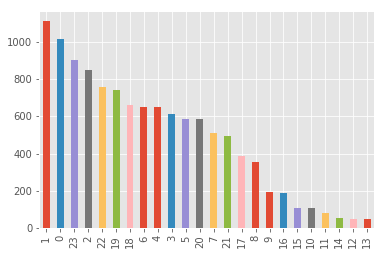

In [70]:
df_new['hour'].value_counts(dropna=False).plot.bar()

Convert UTC time to Beijing Time, work time (8-17) is (0-9)

In [71]:
df_new['worktime'] = ((df_new.hour >= 0) & (df_new.hour <= 9)) * 1

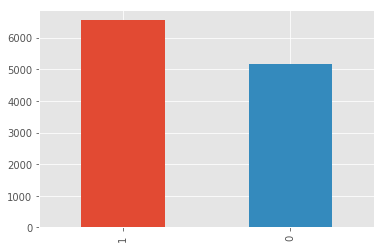

In [72]:
df_new['worktime'].value_counts(dropna=False).plot.bar()

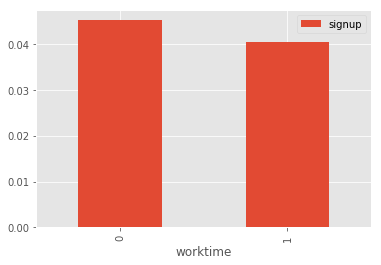

In [73]:
df_new[['worktime', 'signup']].groupby(['worktime']).mean().plot.bar()

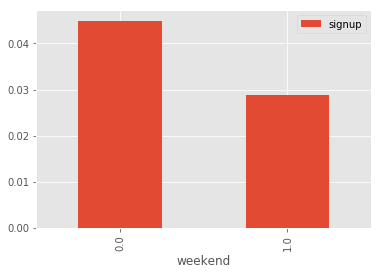

In [74]:
df_new[['weekend', 'signup']].groupby(['weekend']).mean().plot.bar()

People has same signup rate over the weekends

In [75]:
df_new.columns

Index(['CN', 'CT', 'browser', 'browser_v', 'content', 'day', 'dist_id',
       'event', 'freq', 'ip', 'is_fd', 'is_ft', 'latest_utm_content',
       'latest_utm_m', 'latest_utm_s', 'medium', 'model', 'os', 'os_version',
       'pageP', 'pageS', 'signup', 'source', 'time', 'weekend', 'Ttoend',
       'count', 'npage', 'nclick', 'ileave', 'avg_st', 'browser_chrome',
       'model_bin', 'os_bin', 'CT_bin', 'PRO', 'PRO_bin', 'hour', 'worktime'],
      dtype='object')

In [76]:
selected_data_csv = 'data/selected_data.csv'
df_new.to_csv(selected_data_csv, index=False)